In [0]:
df=spark.read.csv('/FileStore/tables/Ads_CTR_Optimisation.csv',header=True)
df

Out[1]: DataFrame[Ad 1: string, Ad 2: string, Ad 3: string, Ad 4: string, Ad 5: string, Ad 6: string, Ad 7: string, Ad 8: string, Ad 9: string, Ad 10: string]

In [0]:
df=df.toPandas()
df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [0]:
N = 10000  # Number of rounds
d = 10  # Number of ads (arms)
number_of_reward_1 = [0] * d  # Count of rewards 1 for each ad
number_of_reward_0 = [0] * d  # Count of rewards 0 for each ad
total_reward = 0  # Total reward obtained
ads = []  # List to store selected ads

for n in range(N):
    max_random = 0  # Reset max_random in each round
    ad = 0  # Initialize chosen ad

    for i in range(d):
        random_beta = rm.betavariate(number_of_reward_1[i] + 1, number_of_reward_0[i] + 1)
        
        if random_beta > max_random:
            max_random = random_beta
            ad = i

    ads.append(ad)
    reward = int(df.values[n, ad])  # Convert to integer

    if reward == 1:
        number_of_reward_1[ad] += 1
    else:
        number_of_reward_0[ad] += 1  # Fixed the update operation

    total_reward += reward  # Accumulate total reward


In [0]:
total_reward

Out[19]: 2579

Out[20]: (array([ 105.,   65.,   44.,  134., 9259.,   25.,   49.,  247.,   33.,
          39.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

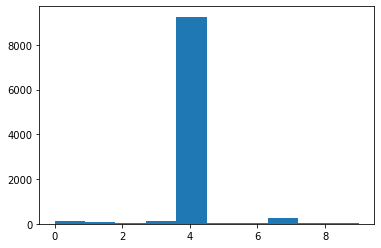

In [0]:
import matplotlib.pyplot as plt

plt.hist(ads)